<a href="https://colab.research.google.com/github/thnosthanos/Geeksman_AISquad_Project1_ShubhamBansal/blob/master/Prediction_fun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/drive/folders/14qaRTCQ3SVfHW7rPOzSSUB25ncejdpLs?usp=sharing

In this final notebook,we will import out trained module and will pass some random images to test the accuracy of our model on real time examples and at last we will generate a video depicting the same.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing our Machine learning model.

In [ ]:
!wget -O "export.pkl" "https://drive.google.com/uc?id=1mixxU8HAMN6PcvO9o8NFjXcoumc-w8_T"

--2020-08-01 13:02:33--  https://drive.google.com/uc?id=1mixxU8HAMN6PcvO9o8NFjXcoumc-w8_T
Resolving drive.google.com (drive.google.com)... 173.194.217.113, 173.194.217.100, 173.194.217.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘export.pkl’

export.pkl              [ <=>                ]   3.15K  --.-KB/s    in 0s      

2020-08-01 13:02:33 (30.4 MB/s) - ‘export.pkl’ saved [3227]



Loading our model in variable Predictor.

In [ ]:
predictor = load_learner('/content/drive/My Drive/dl_projects/vehicle_detection')

Defining our prediction function which will take the path of the image and run the model on the image and will return the Predicted output.

In [ ]:
def prediction_fun(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

Importing random images from our System.

In [ ]:
from google.colab import files
testImage = files.upload()

Saving dhiva-krishna-X16zXcbxU4U-unsplash.jpg to dhiva-krishna-X16zXcbxU4U-unsplash.jpg
Saving vishu-gowda-uN-q7f-SiT4-unsplash.jpg to vishu-gowda-uN-q7f-SiT4-unsplash.jpg
Saving dietmar-reichle-caiX9QloFc8-unsplash.jpg to dietmar-reichle-caiX9QloFc8-unsplash.jpg
Saving andrew-pons-cLHPacdtpSY-unsplash.jpg to andrew-pons-cLHPacdtpSY-unsplash.jpg
Saving mario-sessions-0TmYp58QVNQ-unsplash.jpg to mario-sessions-0TmYp58QVNQ-unsplash.jpg
Saving chelsea-audibert-PEzK8TEF6Dc-unsplash.jpg to chelsea-audibert-PEzK8TEF6Dc-unsplash (1).jpg


This code is just for testing purpose only.Since our uploaded images are stored in a dictionary variable test image ,we are printing the keys of the dictionary to check that our Images are uploaded properly or not.

In [ ]:
print(testImage.keys())

dict_keys(['dhiva-krishna-X16zXcbxU4U-unsplash.jpg', 'vishu-gowda-uN-q7f-SiT4-unsplash.jpg', 'dietmar-reichle-caiX9QloFc8-unsplash.jpg', 'andrew-pons-cLHPacdtpSY-unsplash.jpg', 'mario-sessions-0TmYp58QVNQ-unsplash.jpg', 'chelsea-audibert-PEzK8TEF6Dc-unsplash.jpg'])


This Chunk of code is very Important.<br>
Here,we are first converting the key dictionary to a list and storing it in a variable.We are converting it into list because list is an iterable type and we can iterate the list using for loops.Now one by one we are passing our uploaded images in that predictor function and displaying the ouput returned by the function.

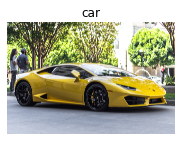

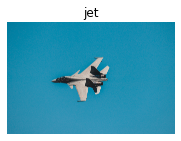

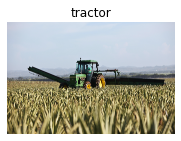

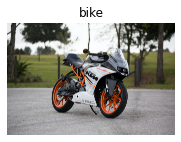

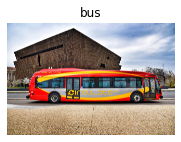

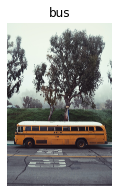

In [ ]:
imgpath = list(testImage.keys())
os.makedirs("output",exist_ok=True)
count = 0
for i in imgpath:
  img = open_image(i)
  title = str(prediction_fun(i))
  img.show(title=title)
  plt.savefig("output/output{}.jpg".format(count))
  count += 1

Code for Setting Framerate and other important parameter for the video we will generate.

In [ ]:
%cd "output"
!ffmpeg -framerate 2 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/output
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libx

Installing Kora

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Generating a public url of generated video so that it can be played in browser as well.

In [ ]:
url = upload_public('my_final_output.mp4')
print(url)

https://drive.google.com/uc?id=1nqcEJoJ11eckcVVIRiorJlGqhqmus2Lm


Code for Playing the created video in Colab.

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")